In [1]:
#import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high= 90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
#Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

33.63695714588158 -136.3717760045525
-83.14318479075266 -69.94123070200267
78.11664966426267 -165.0436918609643
54.00236940255607 99.22511809142088
-69.94990434754921 87.9675520736759
-76.18923151686889 99.54807185544149
-32.226803801543916 -104.34114376058966
-48.26717901133505 120.37482418391807
-47.768250770248436 119.54434433359779
58.541548720646944 -142.30345035625226
-41.659453675823904 128.19730541571738
-44.74821661096161 99.18449015996481
-54.33703194505632 30.601785269439034
-67.927194213853 68.34922302456502
-19.333775037197412 -175.16122220088306
-70.81161846891086 43.41357351144927
-59.895466333258746 79.41251809377559
-72.33549222323015 -86.27333634210765
-76.77159489952939 65.39495960099137
-25.77286721682195 63.60273050549239
26.654593194131564 46.577156949523726
-70.93741490804959 52.47697660545484
65.08468665363336 -173.56152269261122
-78.26352181735412 93.20641324819735
32.80112289450909 79.01197858548142
57.56081515681478 65.03241212224032
-68.27197460880541 78.925

-55.65592396558776 -119.65844341268446
-70.61656767457318 -23.98349665049804
-32.1579231679248 112.38505690174986
59.544809571672914 112.02772791658361
62.949850931920224 156.23481208565448
-57.898199031476764 -22.145070229250337
-61.80221422317886 -116.08499458695988
-51.723303077501676 42.282873902169456
22.508932552431546 -46.25536852976569
56.21705662296307 69.73603205579283
63.55960391011047 82.05022967192292
-54.668554484926425 -95.57830565792095
-5.354209179176067 -147.90806058401157
-30.521948606166767 -7.990504590589012
31.982228280815832 107.07077600727985
2.493058916673519 -82.10462478100663
54.25420082289202 -159.29832335834743
55.539731104126645 6.9832161359736915
25.25882734245964 -111.19290096237816
-89.61322763943686 137.00363951762245
49.68773319118722 -145.06044922230228
65.5993392342377 -10.247108425680466
-57.04716781676819 65.04148379762205
-17.155783657824443 -84.64804134498874
-8.006150484177724 154.0855026341572
-20.30171081947232 47.25330218122369
-30.761039386

73.14606820703548 -40.16433022619921
-52.669100284785934 86.6192815788853
-74.71016807262708 -75.34919668085331
20.827924213688206 151.87174993991982
-87.6572148802935 132.84910663920266
-26.78359730899045 -156.2620756062745
79.98998769748488 69.86641552987089
50.48245790181721 134.41748747960213
27.074327734686037 175.21262940329638
75.30500826312462 -178.26782745219148
43.3944721651317 96.4882685534451
-69.56408369848596 -59.93384656998059
28.12779886991187 -34.19818292234538
51.64754578811147 38.6467135053893
-15.424390604155633 -87.17458177106852
37.54983592775628 -76.80772259269698
70.05790375215165 -167.33280461393355
65.60088173905234 -56.34543080664774
-18.794153484237356 -27.142279785025266
14.866040643842965 -125.01342010146422
14.904694138111083 -157.51163009783207
-88.61134502796615 106.427711716962
52.629965569569634 -103.70521492022971
-51.154281455863966 43.790603238488615
8.210092818435882 179.9847225550668
42.90376793949633 50.96170384060213
84.83859088871569 66.710009

In [5]:
from citipy import citipy

In [6]:
#Create a list for holding the cities.

cities = []

#Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will ad ti to the cities list.
    
    if city not in cities:
        cities.append(city)
    
#Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | shumskiy
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | haines junction
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | pangai
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | riyadh
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | sarahan
Processing Record 20 of Set 1 | azanka
Processing Record 21 of Set 1 | banjar
Processing Record 22 of Set 1 | nemuro
Processing Record 23 of Set 1 | novaya zaimka
Processing Record 24 of 

Processing Record 43 of Set 4 | poum
Processing Record 44 of Set 4 | kudahuvadhoo
Processing Record 45 of Set 4 | mirnyy
Processing Record 46 of Set 4 | chicama
Processing Record 47 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 48 of Set 4 | chalmette
Processing Record 49 of Set 4 | conceicao do araguaia
Processing Record 50 of Set 4 | bellevue
Processing Record 1 of Set 5 | vangaindrano
Processing Record 2 of Set 5 | daule
Processing Record 3 of Set 5 | altamont
Processing Record 4 of Set 5 | vardo
Processing Record 5 of Set 5 | chatellerault
Processing Record 6 of Set 5 | hervey bay
Processing Record 7 of Set 5 | hamilton
Processing Record 8 of Set 5 | mandalgovi
Processing Record 9 of Set 5 | airai
Processing Record 10 of Set 5 | laichingen
Processing Record 11 of Set 5 | pevek
Processing Record 12 of Set 5 | tiznit
Processing Record 13 of Set 5 | bossembele
City not found. Skipping...
Processing Record 14 of Set 5 | narsaq
Processing Record 15 of Set 5 | namibe


City not found. Skipping...
Processing Record 29 of Set 8 | nagua
Processing Record 30 of Set 8 | shawville
Processing Record 31 of Set 8 | grand-santi
Processing Record 32 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 33 of Set 8 | rock falls
Processing Record 34 of Set 8 | vaitape
Processing Record 35 of Set 8 | honiara
Processing Record 36 of Set 8 | maloshuyka
City not found. Skipping...
Processing Record 37 of Set 8 | san quintin
Processing Record 38 of Set 8 | vila franca do campo
Processing Record 39 of Set 8 | yar-sale
Processing Record 40 of Set 8 | sohag
Processing Record 41 of Set 8 | ilulissat
Processing Record 42 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 8 | lagos
Processing Record 44 of Set 8 | lexington
Processing Record 45 of Set 8 | kuvshinovo
Processing Record 46 of Set 8 | torata
Processing Record 47 of Set 8 | khormuj
City not found. Skipping...
Processing Record 48 of Set 8 | alofi
Processing Record 49 of

Processing Record 17 of Set 12 | mentok
City not found. Skipping...
Processing Record 18 of Set 12 | cabedelo
Processing Record 19 of Set 12 | ishigaki
Processing Record 20 of Set 12 | sola
Processing Record 21 of Set 12 | kodinsk
Processing Record 22 of Set 12 | namatanai
Processing Record 23 of Set 12 | kieta
Processing Record 24 of Set 12 | butembo
Processing Record 25 of Set 12 | baryatino
Processing Record 26 of Set 12 | valparaiso
Processing Record 27 of Set 12 | avera
Processing Record 28 of Set 12 | litovko
Processing Record 29 of Set 12 | hami
Processing Record 30 of Set 12 | khokholskiy
City not found. Skipping...
Processing Record 31 of Set 12 | williamsburg
Processing Record 32 of Set 12 | sisimiut
Processing Record 33 of Set 12 | belmonte
Processing Record 34 of Set 12 | kelvington
Processing Record 35 of Set 12 | kuryk
Processing Record 36 of Set 12 | abilene
Processing Record 37 of Set 12 | berdigestyakh
Processing Record 38 of Set 12 | japura
Processing Record 39 of Set

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.5982,-124.1573,64.65,66,75,5.99,US,2022-06-19 22:29:31
1,Ushuaia,-54.8000,-68.3000,29.86,100,100,3.44,AR,2022-06-19 22:29:32
2,Barrow,71.2906,-156.7887,46.42,76,0,13.80,US,2022-06-19 22:29:32
3,Shumskiy,54.8318,99.1328,54.64,90,87,2.46,RU,2022-06-19 22:29:32
4,Busselton,-33.6500,115.3333,58.96,79,100,2.91,AU,2022-06-19 22:29:33
5,Albany,42.6001,-73.9662,69.46,36,3,1.01,US,2022-06-19 22:29:33
6,Lebu,-37.6167,-73.6500,51.67,87,100,10.27,CL,2022-06-19 22:29:34
7,Haines Junction,60.7522,-137.5108,62.55,36,29,11.50,CA,2022-06-19 22:29:34
8,Esperance,-33.8667,121.9000,48.04,80,100,9.82,AU,2022-06-19 22:29:34
9,Port Elizabeth,-33.9180,25.5701,47.10,93,0,5.75,ZA,2022-06-19 22:29:35


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

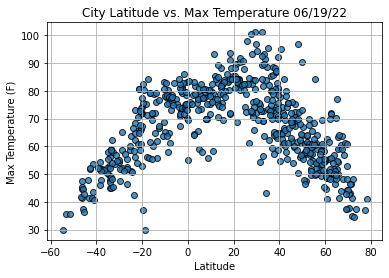

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

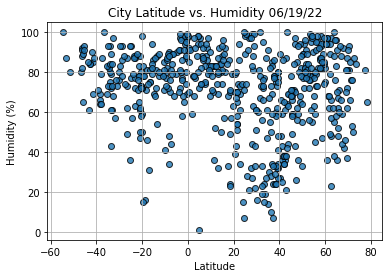

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

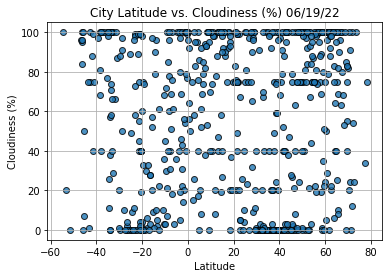

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

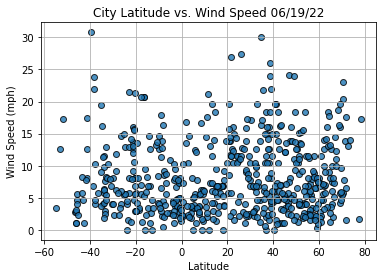

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

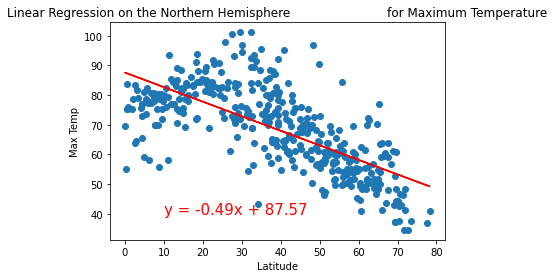

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

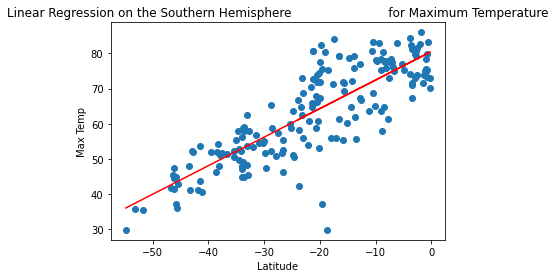

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

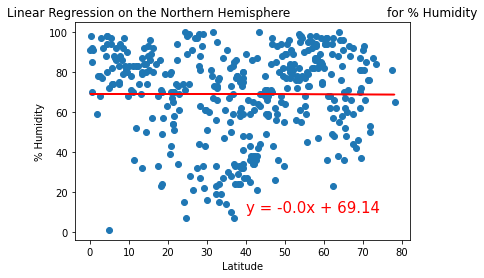

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

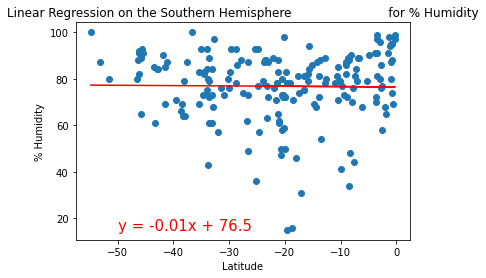

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

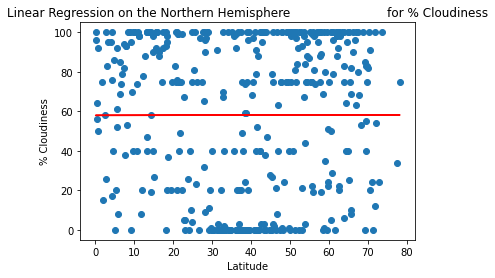

In [26]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

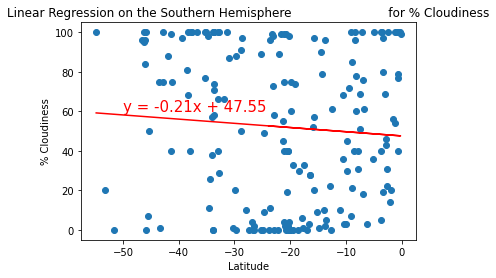

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

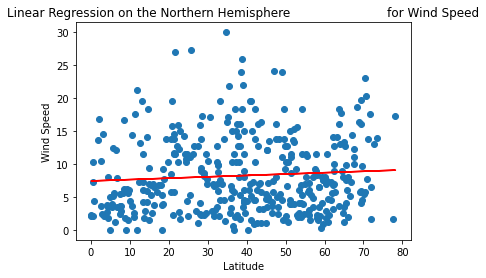

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

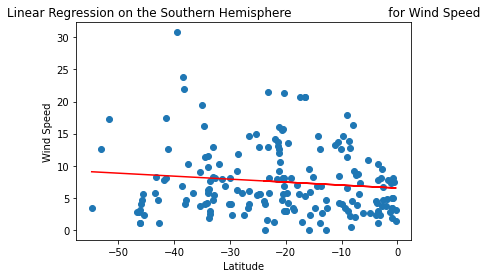

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))